# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 29.11.2023

Мягий дедлайн: 23:59 12.12.2023

Жестокий дедлайн: 23:59 14.12.2023

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест https://contest.yandex.ru/contest/56884/problems/ нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [208]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0., )
]

In [209]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

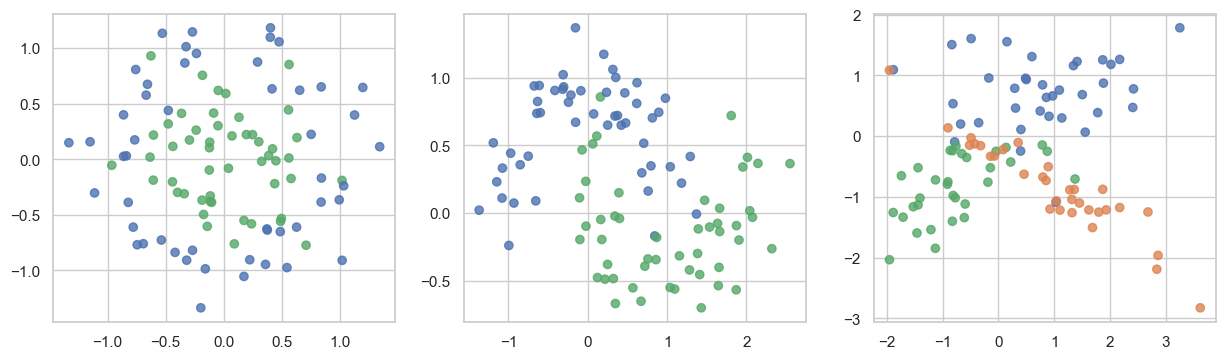

In [210]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [211]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

In [212]:
def plot_surface_2(clf, X, y, ax):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = ax.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

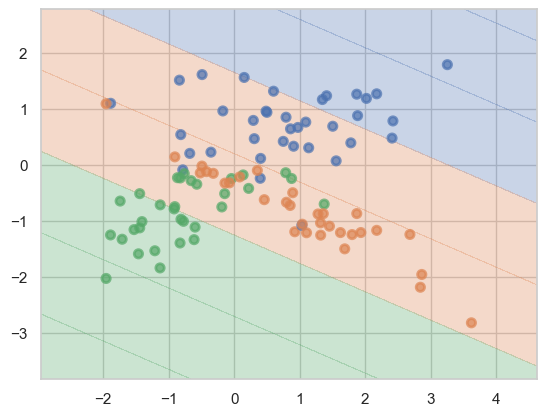

In [213]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

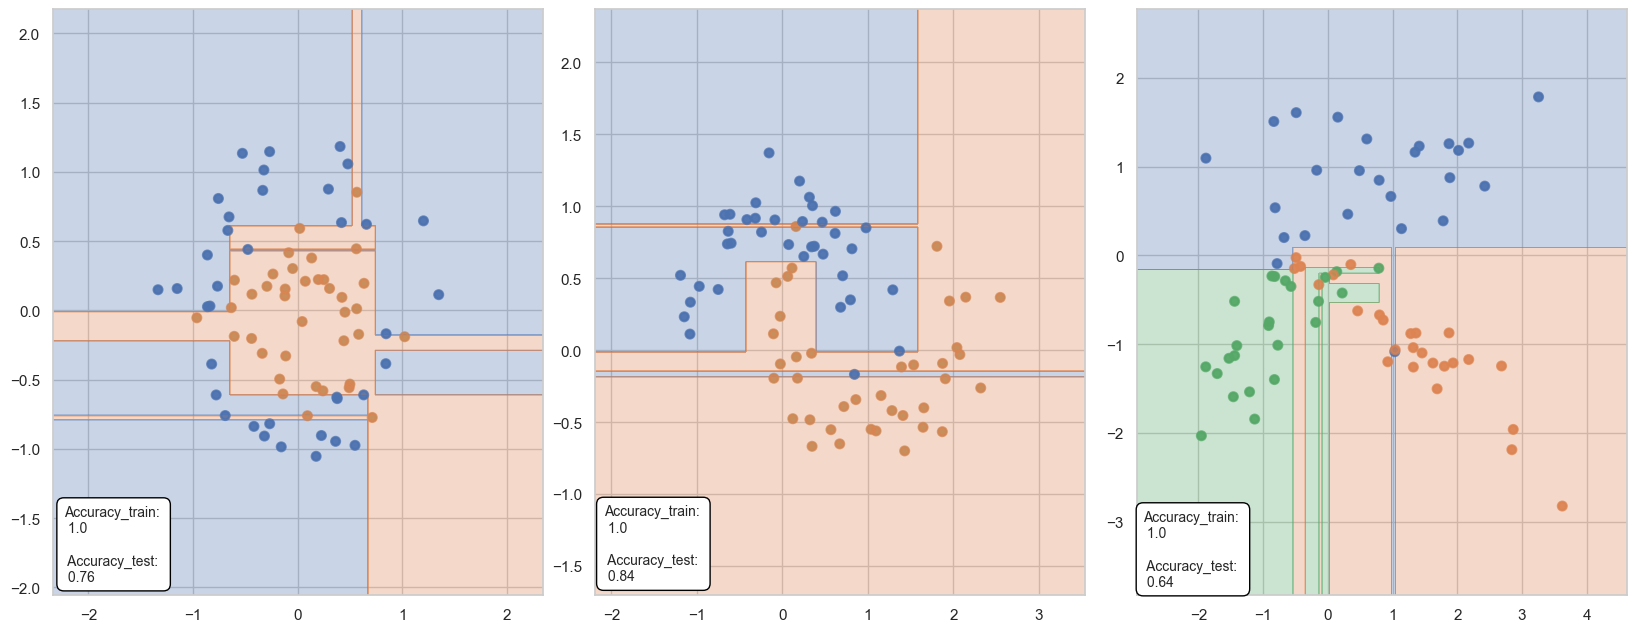

In [435]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

plt.figure(figsize=(17, 7))
for i, (x, y) in enumerate(datasets):
    ax = plt.subplot(1, 3, i + 1)

    X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=52)

    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap, alpha=.8)

    model = DecisionTreeClassifier(random_state=52)
    model.fit(X_train, y_train)

    plot_surface(model, X_train, y_train)

    accuracy_train = accuracy_score(y_train, model.predict(X_train))
    accuracy_test = accuracy_score(y_test, model.predict(X_test))

    ax.text(ax.get_xlim()[0] + 0.1, ax.get_ylim()[0] + 0.1, f'Accuracy_train: \n {accuracy_train} \n\n Accuracy_test: \n {accuracy_test}', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=.5'), fontsize='small')

> ### **<div style='color:red'> Ответ: </div>**
>
> #### На всех графиках можно заметить, что на всех графиках есть "отрезки", которые стараются выделять небольшое количество объектов, что и является одним из признаков переобучения. Может показаться, что таких отрезков немного, но на самом деле для достаточно небольшой выборки это уже может быть критичным. Также если посмотреть на результаты на обучающей и на тестовой выборках сильно отличаются, что говорит о переобученности модели. Но стоит отметить, что для набора <code>Make moons</code> у дерева не такая сильная переобученность, поскольку нету "резких" разделений, как например для набора <code>Make classification</code>, а также $Accuracy$ на тестовой выборке достаточно высокий
>
> #### Поскольку в <code>Make classification</code> 3 класса, то видно, что для многоклассовой классификации дерево получилось сильно переобученным и $Accuracy$ на тестовой выборке очень маленький

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

## <div style='color:blue'> Make circles </div>

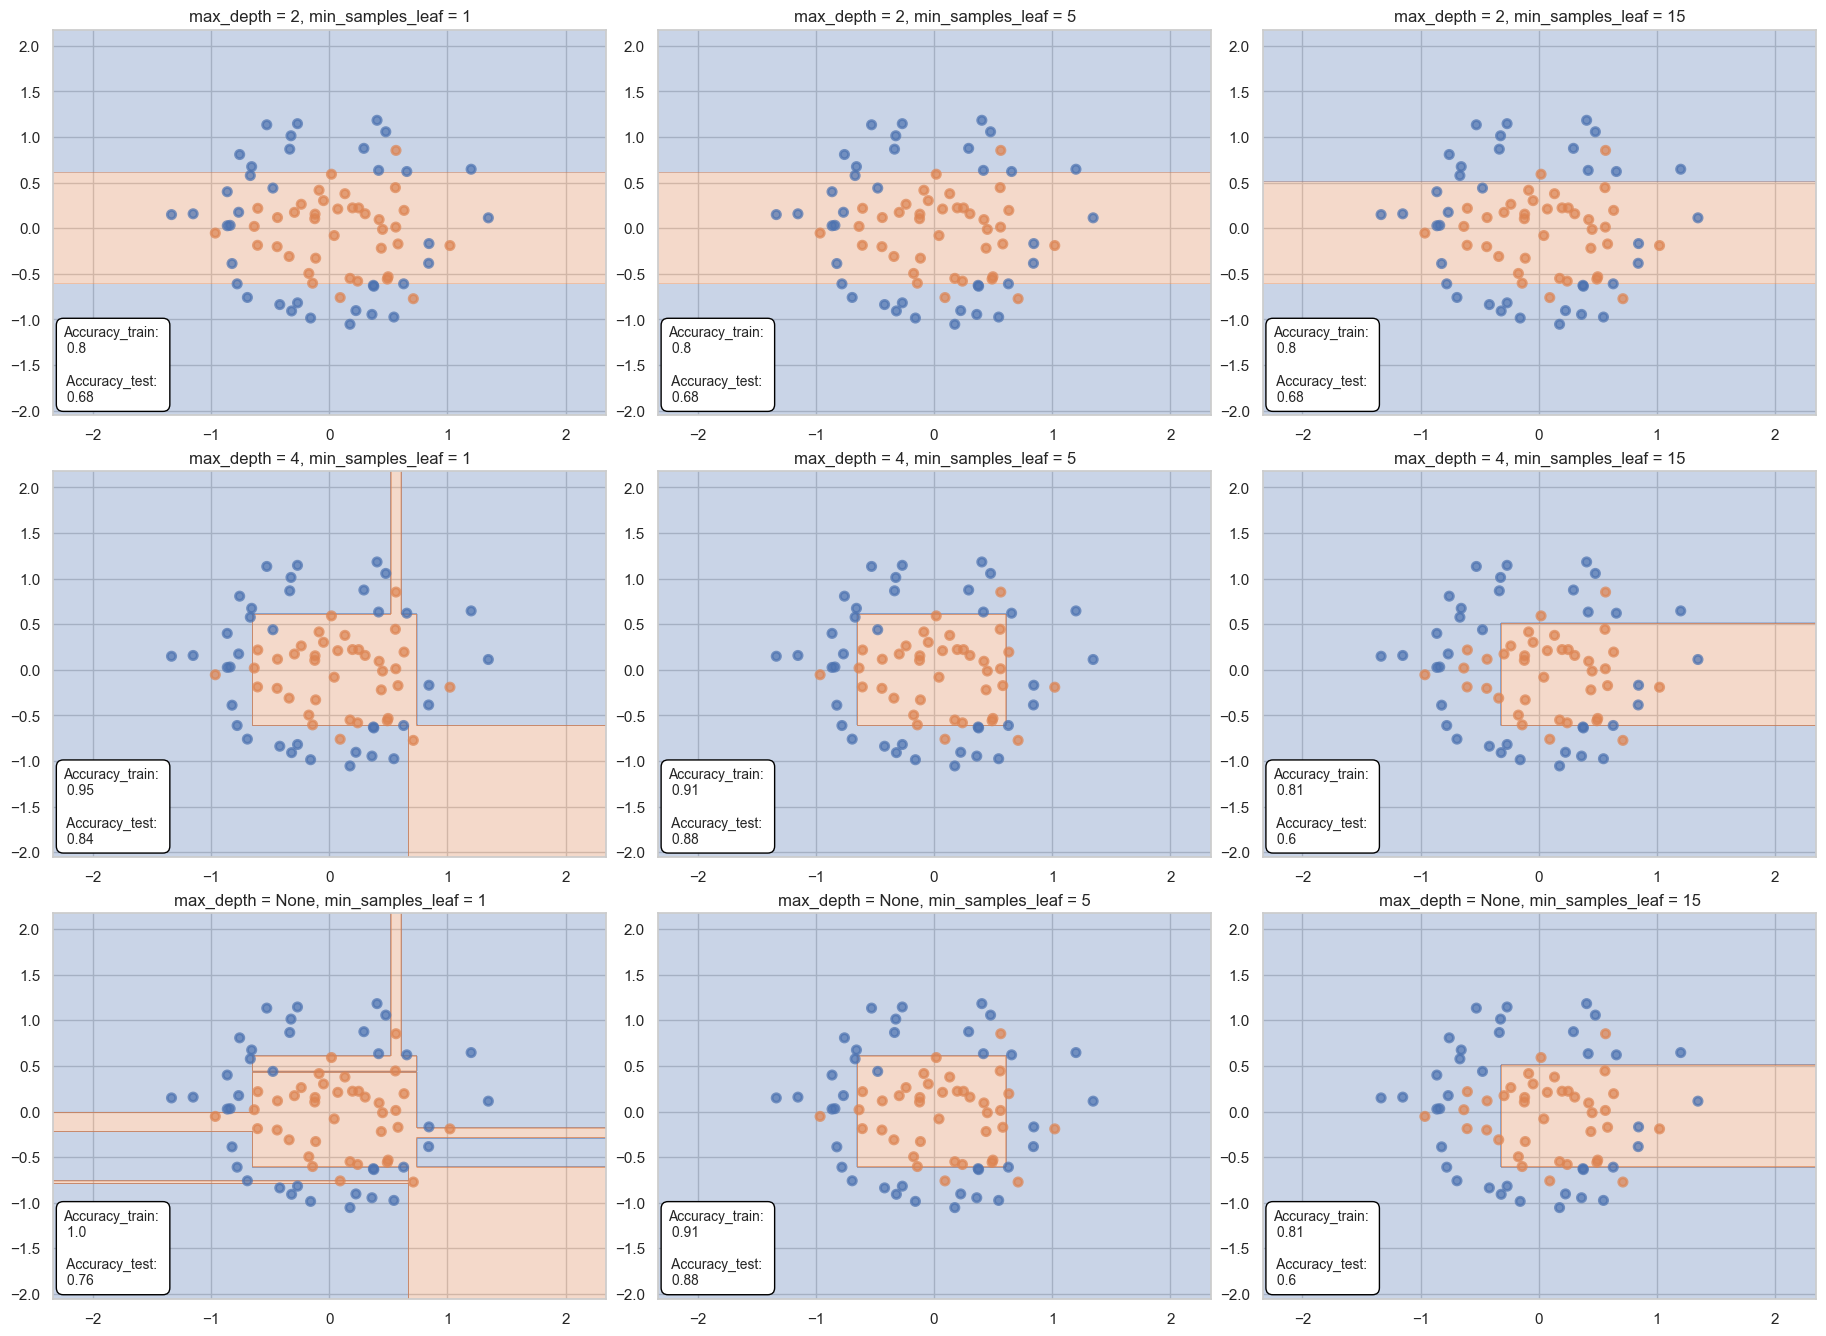

In [396]:
X_train_cr, X_test_cr, y_train_cr, y_test_cr = train_test_split(datasets[0][0], datasets[0][1], random_state=52)

i = j = 0

max_depth = [2, 4, None]
min_samples_leaf = [1, 5, 15]

figure, ax = plt.subplots(3, 3, figsize=(19, 14))

for depth in max_depth:

    for leaf in min_samples_leaf:

        model = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=leaf, random_state=52)

        model.fit(X_train_cr, y_train_cr)

        plot_surface_2(model, X_train_cr, y_train_cr, ax[i][j])

        ax[i][j].set_title(f'max_depth = {depth}, min_samples_leaf = {leaf}')


        pred = model.predict(X_train_cr)

        accuracy_train = round(accuracy_score(y_train_cr, model.predict(X_train_cr)), 2)
        accuracy_test = round(accuracy_score(y_test_cr, model.predict(X_test_cr)), 2)

        ax[i][j].text(-2.25, -1.9, f'Accuracy_train: \n {accuracy_train} \n\n Accuracy_test: \n {accuracy_test}', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=.5'), fontsize='small')


        if j == 2:
            j=0
            i+=1
        else: j+=1

## <div style='color:blue'> Make moons </div>

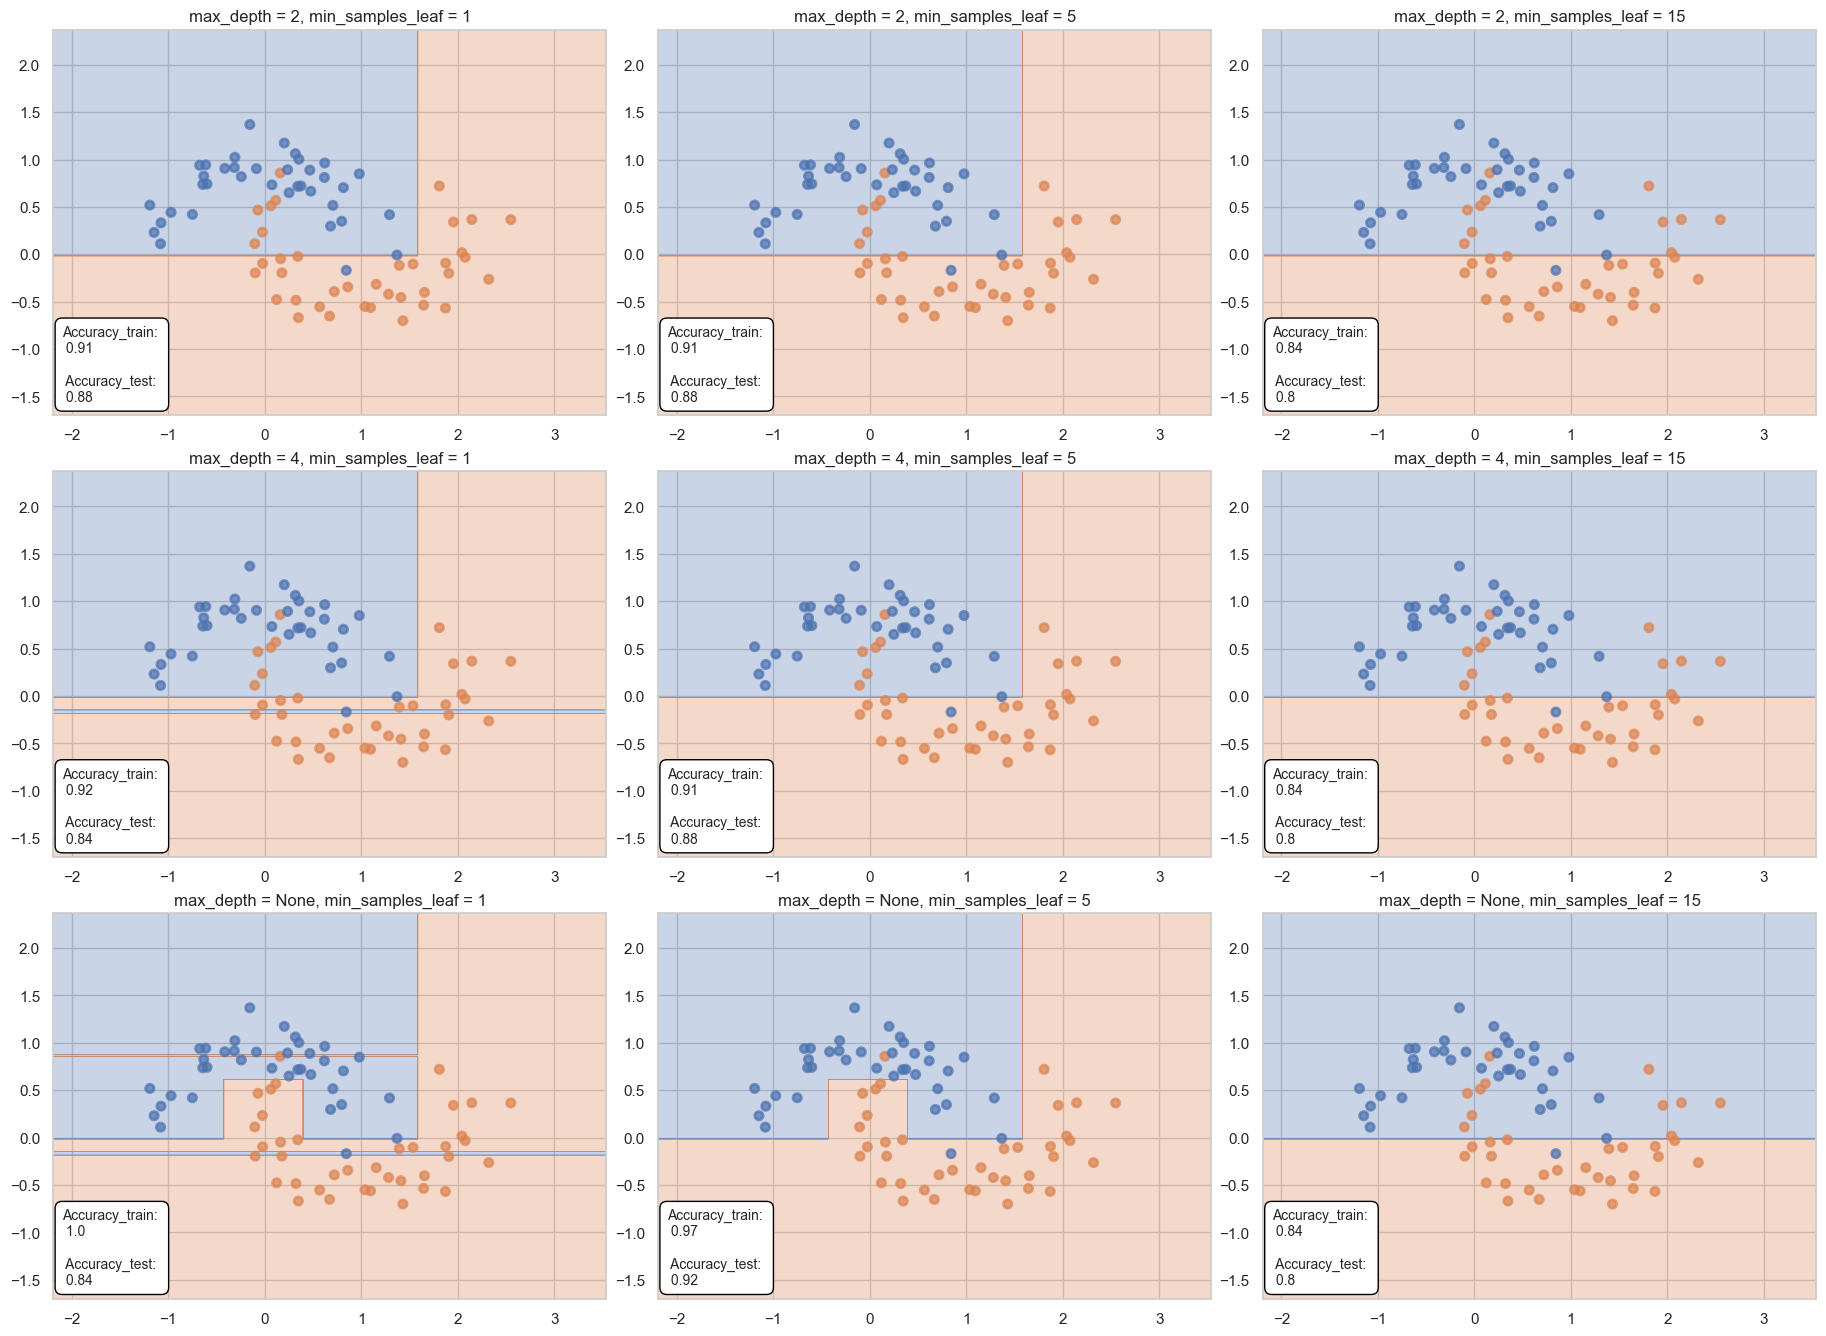

In [391]:
X_train_mm, X_test_mm, y_train_mm, y_test_mm = train_test_split(datasets[1][0], datasets[1][1], random_state=52)

i = j = 0

max_depth = [2, 4, None]
min_samples_leaf = [1, 5, 15]

figure, ax = plt.subplots(3, 3, figsize=(19, 14))

for depth in max_depth:

    for leaf in min_samples_leaf:

        model = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=leaf, random_state=52)

        model.fit(X_train_mm, y_train_mm)

        plot_surface_2(model, X_train_mm, y_train_mm, ax[i][j])

        ax[i][j].set_title(f'max_depth = {depth}, min_samples_leaf = {leaf}')


        pred = model.predict(X_train_cr)

        accuracy_train = round(accuracy_score(y_train_mm, model.predict(X_train_mm)), 2)
        accuracy_test = round(accuracy_score(y_test_mm, model.predict(X_test_mm)), 2)

        ax[i][j].text(-2.1, -1.55, f'Accuracy_train: \n {accuracy_train} \n\n Accuracy_test: \n {accuracy_test}', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=.5'), fontsize='small')


        if j == 2:
            j=0
            i+=1
        else: j+=1

## <div style='color:blue'> Make classification </div>

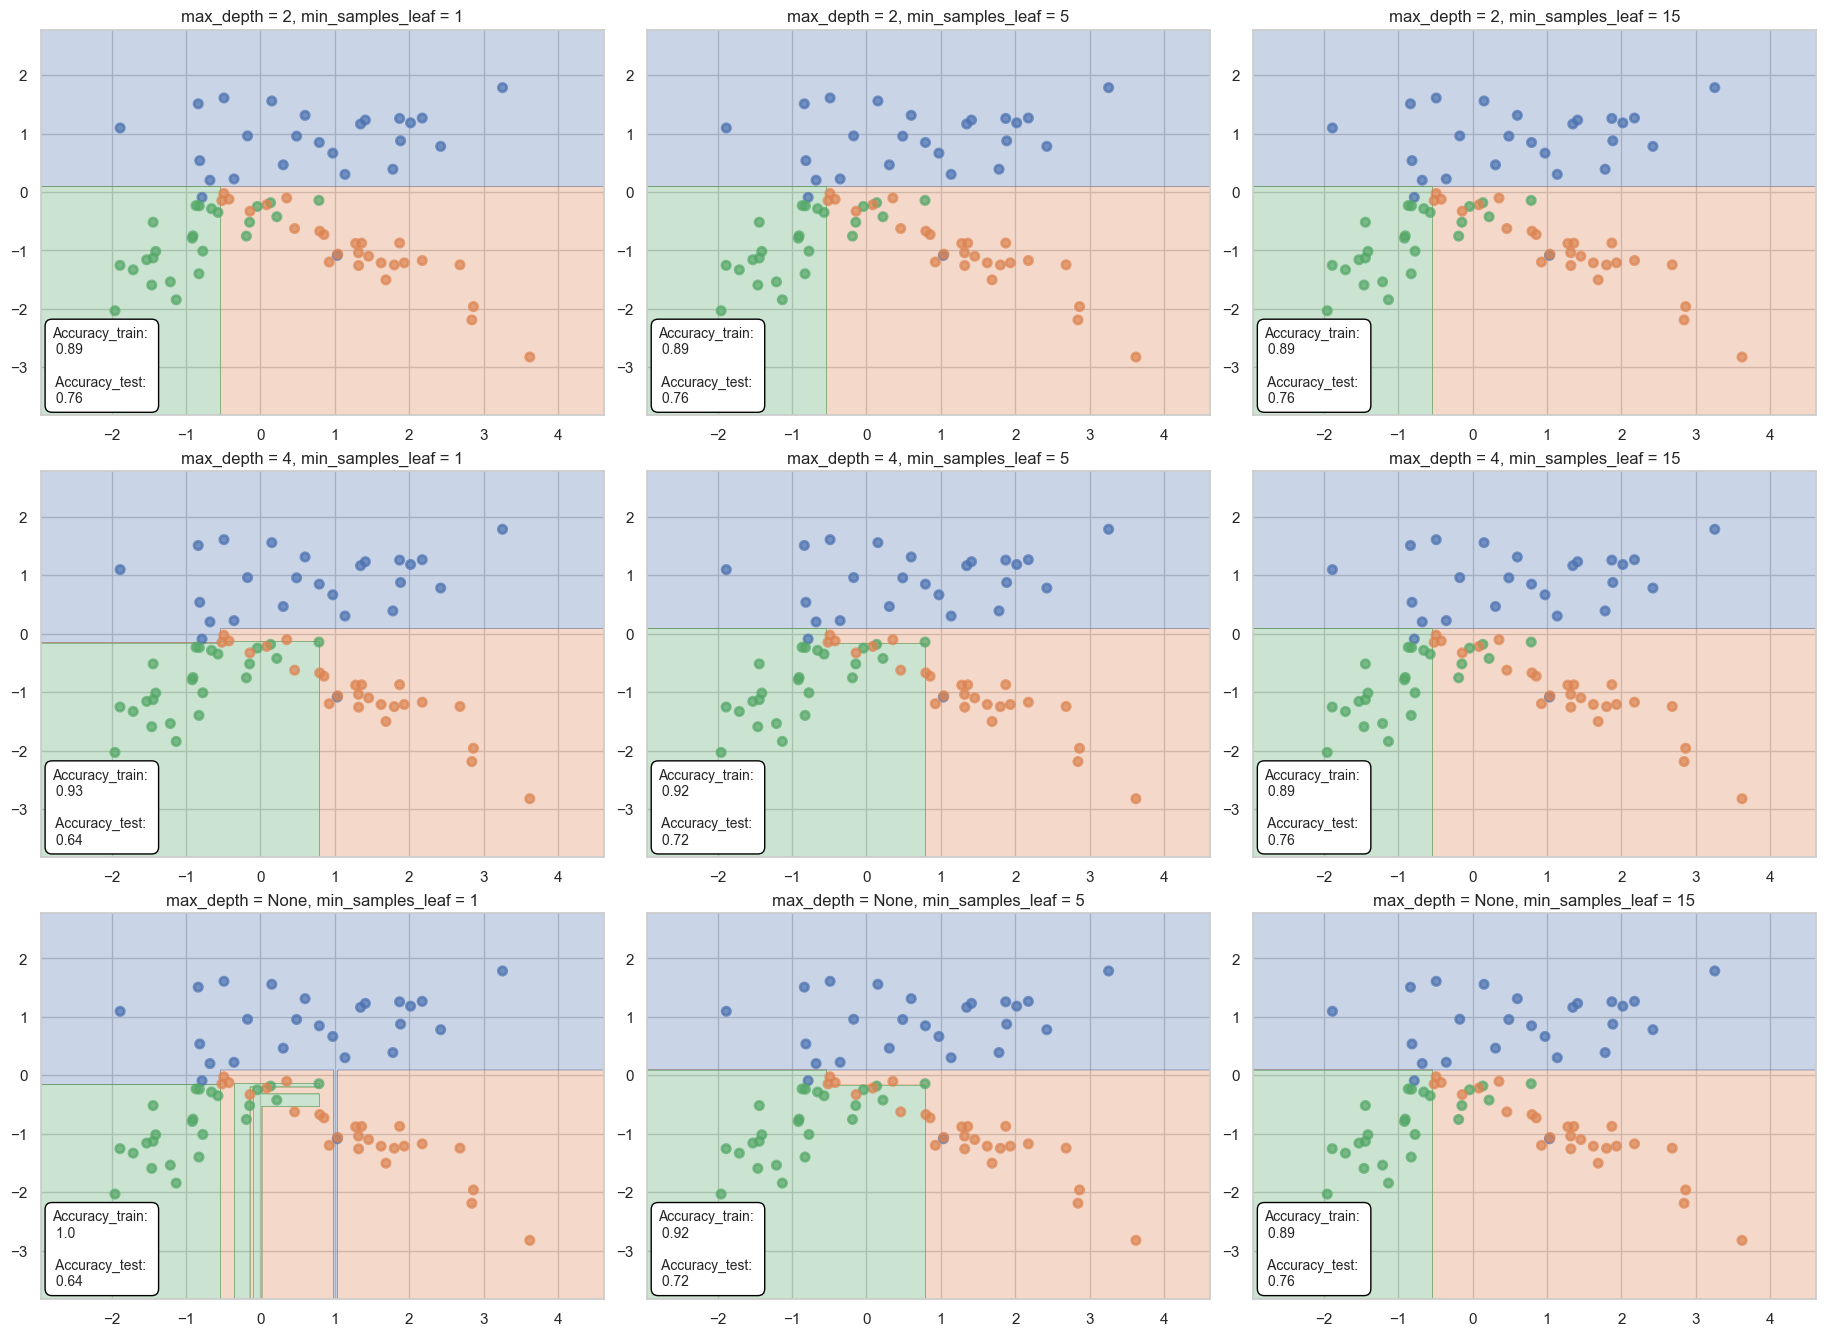

In [468]:
X_train_mc, X_test_mc, y_train_mc, y_test_mc = train_test_split(datasets[2][0], datasets[2][1], random_state=52)

i = j = 0

max_depth = [2, 4, None]
min_samples_leaf = [1, 5, 15]

figure, ax = plt.subplots(3, 3, figsize=(19, 14))

for depth in max_depth:

    for leaf in min_samples_leaf:

        model = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=leaf, random_state=52)

        model.fit(X_train_mc, y_train_mc)

        plot_surface_2(model, X_train_mc, y_train_mc, ax[i][j])

        ax[i][j].set_title(f'max_depth = {depth}, min_samples_leaf = {leaf}')


        pred = model.predict(X_train_mc)

        accuracy_train = round(accuracy_score(y_train_mc, model.predict(X_train_mc)), 2)
        accuracy_test = round(accuracy_score(y_test_mc, model.predict(X_test_mc)), 2)

        ax[i][j].text(-2.8, -3.6, f'Accuracy_train: \n {accuracy_train} \n\n Accuracy_test: \n {accuracy_test}', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=.5'), fontsize='small')


        if j == 2:
            j=0
            i+=1
        else: j+=1
        


> ### **<div style='color:red'> Ответ: </div>**
>
> * #### На всех наборах данных прослеживается, что снятие оганичений на <code>max_depth</code> сильно влияет на его переобученность (видно, что плоскость разделяется на "острые" отрезки, которые выделяют маленькое количество объектов). Также о переобученности свидетельствует достаточно низкое качество на тестовой выборке для <code>Make moons</code> и <code>Make classification</code>
>
> * #### Однако использование параметра <code>min_samples_leaf</code>. Но стоит также отметить, что данный параметр надо аккуратно подбирать, поскольку при неограниченной глубине дерева большие значения <code>min_samples_leaf</code> могут привести еще к большему переобучению (как для наборов <code>Make circles</code> и <code>Make moons</code>)
>
> * #### Для многоклассовой классификации (датасет <code>Make classification</code>) параметр <code>min_samples_leaf</code> достаточно сильно помог с решением проблемы переобученности дерева. <code>Max_depth</code> также помогает бороться с переобучением, дерево с наименьшей глубиной показало достойный результат. Стоит также отметить, что отдача от использований <code>max_depth</code> и <code>min_samples_leaf</code> по отдельности достаточно высока, поэтому без разницы какой из регуляризаторов использовать (но это может быть релевантно только для конкретно данного датасета)
>
> #### В общем случае использование <code>max_depth</code> и <code>min_samples_leaf</code> помогает создавать менее резкие разделения плоскости, что говорит о том, что деревья становятся менее переобученными

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

In [218]:
def find_best_split(feature_vector, target_vector):

    act_sort = np.argsort(feature_vector)
    feature_vector = feature_vector[act_sort]
    target_vector = target_vector[act_sort]

    uniq_vec, indx = np.unique(feature_vector, return_index=True)
    all_t = ((uniq_vec + np.roll(uniq_vec, -1))/2)[:-1]

    ### Расчет кумулятивной суммы классов ###
    num_of_1s = np.cumsum(target_vector)
    s = np.arange(1, len(target_vector)+1)
    change_dot = indx[1:] - 1 ### <--- определение индексов, где значения признака меняются

    p_1 = (num_of_1s / s)[change_dot] ### <--- Расчет p_1 для H_R
    h_1 = 1 - p_1**2 - (1 - p_1)**2
    parts = s[change_dot]/len(feature_vector)  ### <--- Расчет |H_R|/|H|

    num_of_1s = np.cumsum(target_vector[::-1])
    change_dot_2 = len(feature_vector) - 2 - change_dot

    p_2 = (num_of_1s / s)[change_dot_2]
    h_2 = 1 - p_2**2 - (1 - p_2)**2

    gini = -parts * h_1 - (1-parts) * h_2
    
    ind = np.argmax(gini)

    return all_t, gini, all_t[ind], gini[ind]

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

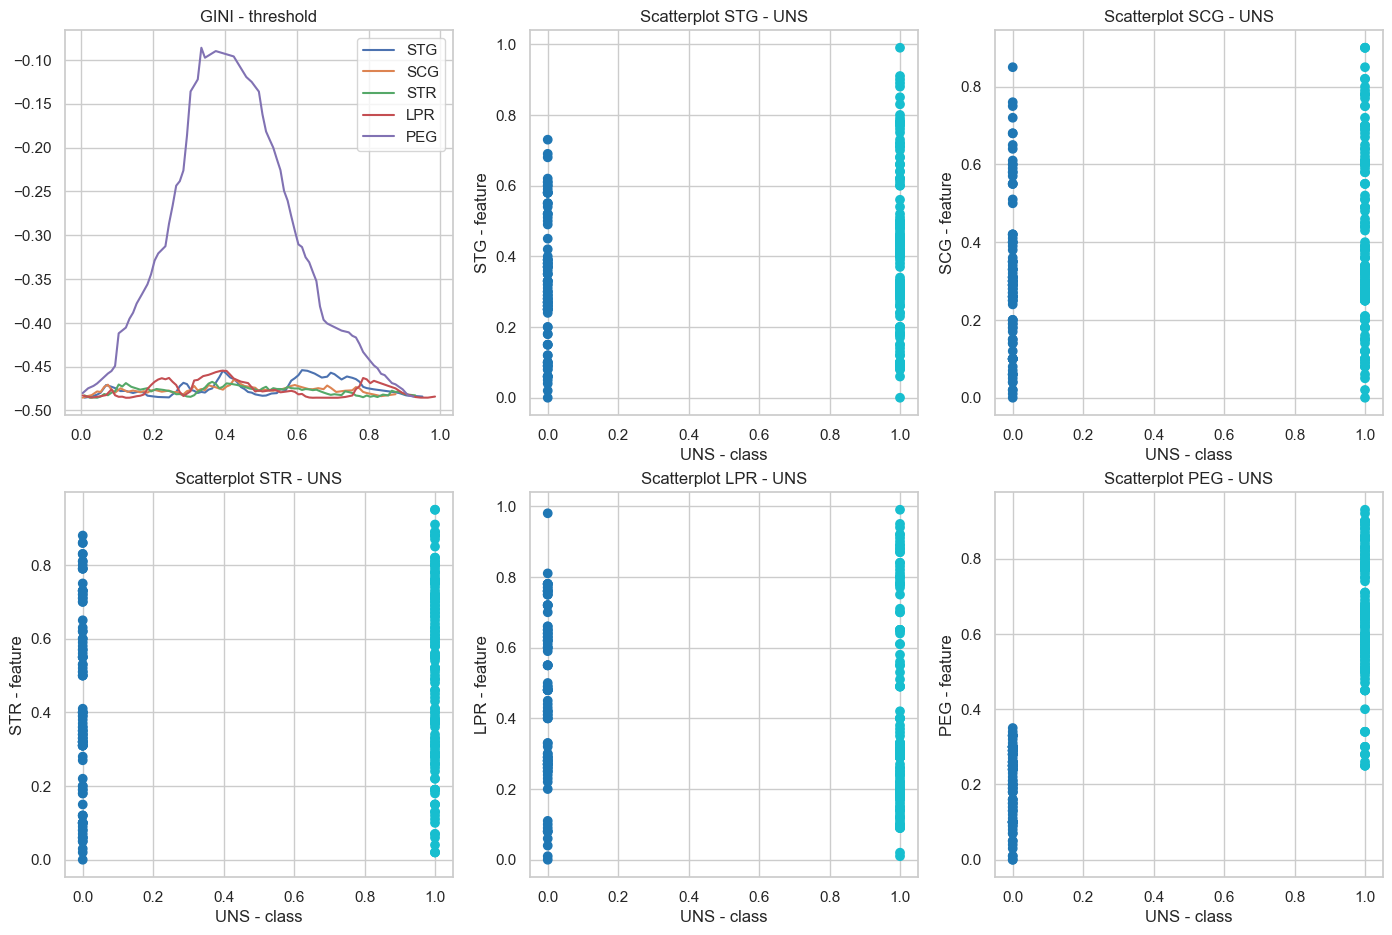

In [219]:
df = pd.read_csv('/Users/vsevolodparamonov/Downloads/students.csv')

fig, ax = plt.subplots(2, 3, figsize=(17, 11))

i = j = 0

for k in df.columns[:-1]:

    x = df[k].values
    y = df['UNS'].values

    params = find_best_split(x, y)

    ax[i][j].plot(params[0], params[1], label=k)

j += 1

for f in df.columns[:-1]:
    
    ax[i][j].scatter(df['UNS'].values, df[f].values, c=df['UNS'].values, cmap='tab10')
    ax[i][j].set_xlabel('UNS - class')
    ax[i][j].set_ylabel(f'{f} - feature')
    ax[i][j].set_title(f'Scatterplot {f} - UNS')

    if j == 2:
        i = 1
        j = 0
    else: j += 1
ax[0][0].set_title('GINI - threshold')
ax[0][0].legend();

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

> ### **<div style='color:red'> Ответ: </div>**
>
> #### Лучшим признаком для разбиения на два поддерева является <code>PEG</code>. Критерий Джини для этого признака является наибольшим (~ -0.1), что говорит о том, что для этого признака можно подобрать порог, который почти идеально сделает разбиение. На графике <code>Scatterplot PEG - UNS</code> видно, что если провести горизонтальную линию на уровне ~ 0.48, то при разбиении на два поддерева в обоих будут находиться объекты с приблизтельно одинаковыми значениями целевой переменной 
>
> #### Что касается остальных признаков, то для них критерий Джини слабо меняется при изменении порога $\Rightarrow$ для этих признаков невозможно подобрать такой порог, который бы почти идеально разбивал выборку на два поддерева. Данное суждение подтверждают графики <code>Scatterplot</code>, по ним видно, что для любой горизонтальной линии (т.е. порога) значения целевой переменной в поддеревьях будет смешаным, т.е. в поддеревьях доли положительного и отрицательного классов будут примерно одинаковыми или же нельзя выделить "доминантный класс"

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [439]:
from sklearn.preprocessing import LabelEncoder
from hw5code import DecisionTree

### Функция для расчета глубины дерева ###
def tree_depth_counter(tree):
    if tree is None:
        return 0
    l = tree_depth_counter(tree.get('left_child'))
    r = tree_depth_counter(tree.get('right_child'))
    return max(l, r) + 1

mushrooms = pd.read_csv('/Users/vsevolodparamonov/Downloads/mushroom/agaricus-lepiota.data', decimal=';')
mushrooms['p'] = mushrooms['p'].apply(lambda x: 1 if x == 'p' else 0)

encoder = LabelEncoder()

mushrooms.loc[:,mushrooms.columns[1:]] = mushrooms.loc[:,mushrooms.columns[1:]].apply(lambda x: encoder.fit_transform(x))

X_train, X_test, y_train, y_test = train_test_split(mushrooms[mushrooms.columns[1:]], mushrooms['p'], test_size=0.5)

tree = DecisionTree(['real'] * X_train.shape[1])

tree.fit(X_train.to_numpy(), y_train.to_numpy())
accuracy = accuracy_score(y_test.to_numpy(), tree.predict(X_test.to_numpy()))
print(f'Accuracy: {accuracy}')
print(f'Глубина дерева: {tree_depth_counter(tree._tree)}')

Accuracy: 1.0
Глубина дерева: 8


__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

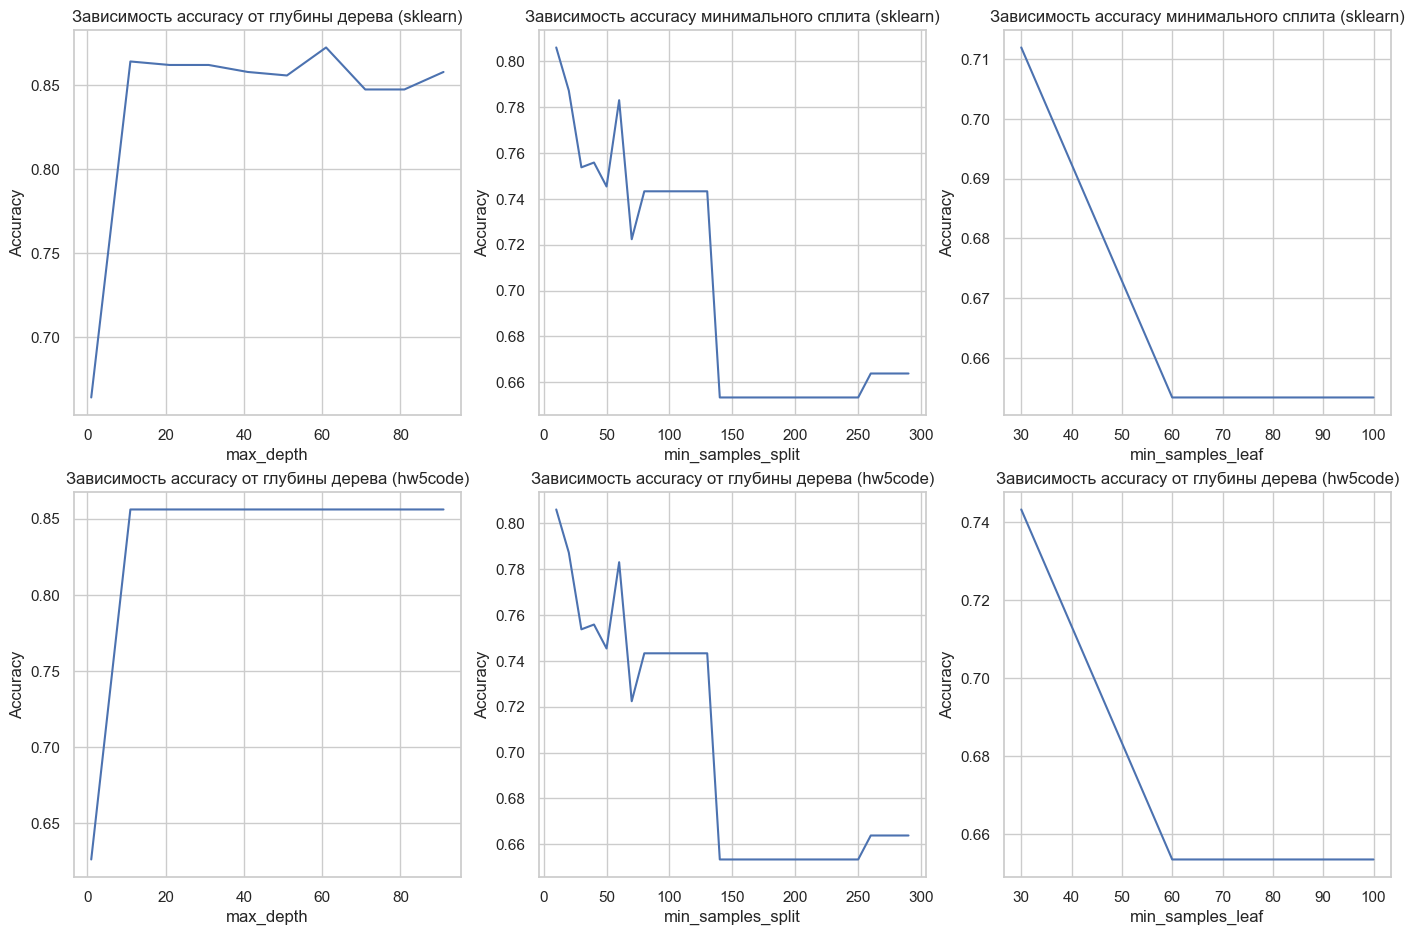

In [472]:
tic_tac = pd.read_csv('/Users/vsevolodparamonov/Downloads/tic-tac-toe-endgame.csv')
tic_tac['V10'] = tic_tac['V10'].apply(lambda x: 1 if x == 'positive' else 0)
tic_tac.loc[:,tic_tac.columns[:-1]] = tic_tac.loc[:,tic_tac.columns[:-1]].apply(lambda x: encoder.fit_transform(x))

X = tic_tac.drop('V10', axis=1)
y = tic_tac['V10']

depths = range(1, 100, 10)
leaves = [30, 60, 100]
splits = np.arange(10, 300, 10)

fig, ax = plt.subplots(2, 3, figsize=(17, 11))

scores_1 = []
scores_2 = []
scores_3 = []

scores_4 = []
scores_5 = []
scores_6 = []


X_t, X_tst, y_t, y_tst = train_test_split(X, y, test_size=0.5, random_state=52)

for i in range(len(depths)): ### <--- Перебор max_depth
    tree = DecisionTreeClassifier(max_depth=depths[i])
    tree_2 = DecisionTree(['real'] * X_t.shape[1], max_depth=depths[i])

    tree.fit(X_t.to_numpy(), y_t.to_numpy())
    tree_2.fit(X_t.to_numpy(), y_t.to_numpy())

    scores_1.append(accuracy_score(y_tst.to_numpy(), tree.predict(X_tst.to_numpy())))
    scores_4.append(accuracy_score(y_tst.to_numpy(), tree_2.predict(X_tst.to_numpy())))

for i in range(len(splits)):  ### <--- Перебор min_samples_split
    tree = DecisionTreeClassifier(min_samples_split=splits[i])
    tree_2 = DecisionTree(['real'] * X_t.shape[1])

    tree.fit(X_t, y_t)
    tree_2.fit(X_t.to_numpy(), y_t.to_numpy())

    scores_2.append(accuracy_score(y_tst, tree.predict(X_tst)))
    scores_5.append(accuracy_score(y_tst.to_numpy(), tree.predict(X_tst.to_numpy())))

for i in range(len(leaves)): ### <--- Перебор min_samples_leaf
    tree = DecisionTreeClassifier(min_samples_leaf=leaves[i])
    tree_2 = DecisionTree(['real'] * X_t.shape[1], min_samples_leaf=leaves[i])

    tree.fit(X_t, y_t)
    tree_2.fit(X_t.to_numpy(), y_t.to_numpy())
    
    scores_6.append(accuracy_score(y_tst.to_numpy(), tree_2.predict(X_tst.to_numpy())))
    scores_3.append(accuracy_score(y_tst, tree.predict(X_tst)))

ax[0][0].plot(depths, scores_1)
ax[0][0].set_title('Зависимость accuracy от глубины дерева (sklearn)')
ax[0][0].set_xlabel('max_depth')
ax[0][0].set_ylabel('Accuracy')

ax[0][1].plot(splits, scores_2)
ax[0][1].set_title('Зависимость accuracy минимального сплита (sklearn)')
ax[0][1].set_xlabel('min_samples_split')
ax[0][1].set_ylabel('Accuracy')

ax[0][2].plot(leaves, scores_3)
ax[0][2].set_title('Зависимость accuracy минимального сплита (sklearn)')
ax[0][2].set_xlabel('min_samples_leaf')
ax[0][2].set_ylabel('Accuracy')


ax[1][0].plot(depths, scores_4)
ax[1][0].set_title('Зависимость accuracy от глубины дерева (hw5code)')
ax[1][0].set_xlabel('max_depth')
ax[1][0].set_ylabel('Accuracy')

ax[1][1].plot(splits, scores_5)
ax[1][1].set_title('Зависимость accuracy от глубины дерева (hw5code)')
ax[1][1].set_xlabel('min_samples_split')
ax[1][1].set_ylabel('Accuracy')

ax[1][2].plot(leaves, scores_6)
ax[1][2].set_title('Зависимость accuracy от глубины дерева (hw5code)')
ax[1][2].set_xlabel('min_samples_leaf')
ax[1][2].set_ylabel('Accuracy');


__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [423]:
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from hw2ndvers import DecisionTree
from sklearn.model_selection import KFold, StratifiedKFold
from hw5code import DecisionTree

### Обработка df

mushrooms = pd.read_csv('/Users/vsevolodparamonov/Downloads/mushroom/agaricus-lepiota.data')
tic_tac = pd.read_csv('/Users/vsevolodparamonov/Downloads/tic-tac-toe-endgame.csv')
cars = pd.read_csv('/Users/vsevolodparamonov/Downloads/car+evaluation/car.data')
nursery = pd.read_csv('/Users/vsevolodparamonov/Downloads/nursery/nursery.data')

### Преобразование признаков

mushrooms['p'] = mushrooms['p'].apply(lambda x: 1 if x == 'p' else 0)
tic_tac['V10'] = tic_tac['V10'].apply(lambda x: 1 if x == 'positive' else 0)
cars['unacc'] = cars['unacc'].apply(lambda x: 0 if (x == 'unacc') | (x == 'acc') else 1)
nursery['recommend'] = nursery['recommend'].apply(lambda x: 0 if (x == 'not_recom') | (x == 'recommend') else 1)

### LabelEcnodera

mushrooms.loc[:,mushrooms.columns[1:]] = mushrooms.loc[:,mushrooms.columns[1:]].apply(lambda x: encoder.fit_transform(x))
tic_tac.loc[:,tic_tac.columns[:-1]] = tic_tac.loc[:,tic_tac.columns[:-1]].apply(lambda x: encoder.fit_transform(x))
cars.loc[:,cars.columns[:-1]] = cars.loc[:,cars.columns[:-1]].apply(lambda x: encoder.fit_transform(x))
nursery.loc[:,nursery.columns[:-1]] = nursery.loc[:,nursery.columns[:-1]].apply(lambda x: encoder.fit_transform(x))

### Массивы с датафреймами, их названиями и названия колонок с таргетами

datas = [mushrooms, tic_tac, cars, nursery]
datas_names = ['mushrooms', 'tic-tac-toe', 'cars', 'nursery']
features_column = ['p', 'V10', 'unacc', 'recommend']

ohe = OneHotEncoder(sparse=False)

answer = pd.DataFrame(columns=['df', 'DT_num', 'DT_cat', 'DT_cat_ohe', 'DTCLF'])

for df, name, feat_column in zip(datas, datas_names, features_column):

    X_num = df.drop(feat_column, axis=1)
    y_num = df[feat_column]

    X_cat = df.astype(str).drop(feat_column, axis=1)
    y_cat = df[feat_column]

    X_cat_ohe = pd.DataFrame(ohe.fit_transform(X_cat))
    y_cat_ohe = df[feat_column]

    tree_1 = DecisionTree(np.array(['real'] * X_num.shape[1])) ### <--- DecisionTree, считающий все признаки вещественными
    tree_2 = DecisionTree(np.array(['categorical'] * X_cat.shape[1])) ### <--- DecisionTree, считающий все признаки категориальными
    tree_3 = DecisionTree(np.array(['real'] * X_cat_ohe.shape[1])) ### <--- DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
    tree_4 = DecisionTreeClassifier() ### <--- DecisionTreeClassifier из sklearn

    acc_1 = np.mean(cross_val_score(tree_1, X_num.to_numpy(), y_num.to_numpy(), scoring=make_scorer(accuracy_score), cv=StratifiedKFold(10, shuffle=True, random_state=52)))
    acc_2 = np.mean(cross_val_score(tree_2, X_cat.to_numpy(), y_cat.to_numpy(), scoring=make_scorer(accuracy_score), cv=StratifiedKFold(10, shuffle=True, random_state=52)))
    acc_3 = np.mean(cross_val_score(tree_3, X_cat_ohe.to_numpy(), y_cat_ohe.to_numpy(), scoring=make_scorer(accuracy_score), cv=StratifiedKFold(10, shuffle=True, random_state=52)))
    acc_4 = np.mean(cross_val_score(tree_4, X_num.to_numpy(), y_num.to_numpy(), scoring=make_scorer(accuracy_score), cv=StratifiedKFold(10, shuffle=True, random_state=52)))

    new_data = pd.DataFrame([[name, acc_1, acc_2, acc_3, acc_4]], columns=answer.columns.values)
    answer = pd.concat([answer, new_data], axis=0)

display(answer)


,df,DT_num,DT_cat,DT_cat_ohe,DTCLF
0,mushrooms,1.000000,1.000000,0.999631,1.000000
0,tic-tac-toe,0.882029,0.947818,0.949912,0.876798
0,cars,0.990167,0.987855,0.987855,0.991323
0,nursery,0.999614,0.999691,0.999691,0.999614


__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

> ### **<div style='color:red'> Ответ: </div>**
>
> #### Если проанализировать столбцы <code>DT_num</code> (собственная реализация) и <code>DTCLF</code> (sklearn), то можно заметить, что результаты практически идентичны. Эти результаты релевантно сравнивать, поскольку они обучались на одних и тех же данных (а также основываясь на результаты задания №8), то можно сделать вывод о том, что собственная реализация примерно совпала с реализацией sklearn
>
> #### Что касается ранжирования алгоритмов на разных наборах данных, то ситуация следующая:
> * #### **mushrooms:** DecisionTree с использованием числовых и категориальных признаков и DecisionTreeClassifier показали наилучшее качество ($Accuracy$ = 1)
> * #### **tic-tac-toe:** Если же использование DecisionTree с использованием OneHotEncoding показало наихудшее качество на датафрейме **mushrooms**, то тут оно показало наилучшее качество среди остальных моделей ($Accuracy$ = 0.949)
>
> * #### **cars:** Для данного набор данных лучшим оказался DecisionTreeClassifier из sklearn, но с небольшим отрывом отстает собственная реализация DecisionTree ($Accuracy \approx$ 0.99)
>
> * #### **nursery:** На данном наборе данных все модели показали себя хорошо, но все же лучшими оказались собственная реализация DecisionTree и DecisionTree из sklearn и показали идентичное качество ($Accuracy$ = 0.999)
>
> #### Перейдем к анализу каждого метода (использование категориальных, числовых признаков и использование OneHotEncoder) на результаты деревьев:
>
> * #### Применение OneHotEncoder ко всему набору данных показало наихудшее качество относительно других методов $\Rightarrow$ можно сделать вывод, что деревья хорошо работают как с числовыми, так и с категориальными признаками, а также нет нужды применять кодирование признаков. Также можно сказать, что использование OneHotEncoding создает большое количество признаков, поэтому и разбиение по этим признакам незначительно ухудшает качесто модели. Но также и стоит отметить, что применение OneHotEncoding показало наилучшее качество на датафрейме <code>tic-tac-toe</code>, поэтому стоит сделать корректировку на то, что степень полезности использования OneHotEncoder зависит от набора данных и в редких случаях может быть полезным
>
> * #### Что касается использования собственной реализации DecisionTree и DecisionTreeClassifier из sklearn, то все-таки есть небольшая разница между моделями, что может быть связано с дефолтными параметрами: в DecisionTreeClassifier по дефолту стоят параметры <code>min_samples_split</code> и <code>min_samples_leaf</code>, что может непосредственно повлиять на результаты
>
> * #### Если анализировать столбцы <code>DT_num</code> и <code>DT_cat</code>, то можно заметить, что в среднем лучше оказалось использование категориальных признаков. Это может быть связано с тем, что для категориальных признаков используется LabelEncoder внутри собственно реализованного дерева, поэтому такое дополнение и показало результат чуть получше, чем обычное использование числовых признаков. В силу того, что LabelEncoder не создает новые признаки, а лишь преобразует уже имеющиеся, то не возникает случай разреженных матриц и поэтому качество лучше, чем применение OneHotEncoder
> 
> * #### По поводу случайной компоненты: если анализировать случайность по результатам $Accuracy$, то единственная случайность возникает во время использования кросс-валидации, поскольку в обучающую выборку попадают разные объекты, что непосредственно влияет на дальнейшее построение дерева (разные признаки могут показывать разные критерии Джини, могут получиться разные пороги). Но как раз использование кросс-валидации помогает сгладить влияение попадающих в обучающую выборку объектов, что помогает более объективно оценить качество модели. __**Предложение:**__ можно делать некоторую внутреннюю кросс-валидацию внутри каждого предиката, таким образом оценивания оптимальные для разбиения признак и порог на разных подвыборках, потом выбирать наиболее встречающийся признак и усреднить значение получившихся порогов для данного признака. Если же признаков достаточно много и не удалось найти самый частый признак, то можно выбрать случайный из наиболее коррелирующих друг с другом признаков или же просто увеличить количество фолдов. **НО!!!** это лишь мое предложение, которое, возможно, на практике окажется неэффективным (как минимум, данный алгоритм будет долго работать) 

In [1]:
mushrooms

NameError: name 'mushrooms' is not defined

## Nickname: vaparamonov_1@edu.hse.ru

## ID успешных посылок в контест:

#### Задание 1: 102472460
#### Задание 2: 102474384

Вставьте что угодно, описывающее ваши впечатления от этого задания: